# **Global YouTube Statistics 2023: Analyzing Worldwide Trends**

### **I. Dataset Description**

The **Global YouTube Statistics 2023** dataset, available on Kaggle, provides a comprehensive overview of YouTube's global landscape in 2023. The dataset includes detailed information about YouTube channels, their statistics, and various metrics that give insights into the platform's usage and popularity worldwide. The data is instrumental in understanding trends, engagement levels, and the performance of different types of content on YouTube.

This dataset contains data collected from various YouTube channels and their videos, providing a snapshot of the platform's global usage in 2023. It includes detailed metrics that help analyze the performance and engagement of YouTube content creators across different regions.

The dataset comprises of columns with varying numbers of observations and variables. Below are descriptions of each column within the dataset:

### **Columns**

- **`rank`** — Position of the YouTube channel based on the number of subscribers
- **`Youtuber`** — Name of the YouTube channel
- **`subscribers`** — Number of subscribers to the channel
- **`video views`** — Total views across all videos on the channel
- **`category`** — Category or niche of the channel
- **`Title`** — Title of the YouTube channel
- **`uploads`** — Total number of videos uploaded on the channel
- **`Country`** — Country where the YouTube channel originates
- **`Abbreviation`** — Abbreviation of the country
- **`channel_type`** — Type of the YouTube channel (e.g., individual, brand)
- **`video_views_rank`** — Ranking of the channel based on total video views
- **`country_rank`** — Ranking of the channel based on the number of subscribers within its country
- **`channel_type_rank`** — Ranking of the channel based on its type (individual or brand)
- **`video_views_for_the_last_30_days`** — Total video views in the last 30 days
- **`lowest_monthly_earnings`** — Lowest estimated monthly earnings from the channel
- **`highest_monthly_earnings`** — Highest estimated monthly earnings from the channel
- **`lowest_yearly_earnings`** — Lowest estimated yearly earnings from the channel
- **`highest_yearly_earnings`** — Highest estimated yearly earnings from the channel
- **`subscribers_for_last_30_days`** — Number of new subscribers gained in the last 30 days
- **`created_year`** — Year when the YouTube channel was created
- **`created_month`** — Month when the YouTube channel was created
- **`created_date`** — Exact date of the YouTube channel's creation
- **`Gross tertiary education enrollment (%)`** — Percentage of the population enrolled in tertiary education in the country
- **`Population`** — Total population of the country
- **`Unemployment rate`** — Unemployment rate in the country
- **`Urban_population`** — Percentage of the population living in urban areas
- **`Latitude`** — Latitude coordinate of the country's location
- **`Longitude`** — Longitude coordinate of the country's location

Using these datasets, we seek to explore the following exploratory data analysis questions:

## **II. Exploratory Data Analysis Questions:**
<ul>
<li>What is the relationship between the number of subscribers and total video views?
<li>What impact does the urban population percentage have on the popularity and performance of YouTube channels?
<li>How does the unemployment rate in a country correlate with the number of successful YouTube channels in that country?
<li>What categories are the most popular among YouTube channels?
<li>How has the number of subscribers grown over the years for YouTube channels created in different years?
<li>Which month has the most YouTube channels created?
</ul>
For this case study, the following variables will be used:

- **`subscribers`** — Number of subscribers to the channel
- **`video views`** — Total views across all videos on the channel
- **`urban population`** — Percentage of the population living in urban areas
- **`unemployment rate`** — Unemployment rate in the country
- **`subscribers`** — Number of new subscribers gained in the last 30 days
- **`category`** — Category or niche of the channel
- **`channel type`** — Type of the YouTube channel (e.g., individual, brand)
- **`created_year`** — Year when the YouTube channel was created
- **`created_month`** — Month when the YouTube channel was created

By analyzing these variables, we aim to gain insights into the current trends and patterns in YouTube content creation and consumption worldwide. This analysis will help understand the factors contributing to the success and popularity of YouTube channels and videos in different regions.

It is important to note that the dataset reflects data collected in 2023, and the trends and insights derived from this analysis are specific to this period. The results may vary with changes in user behavior, content strategies, and platform algorithms over time.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/globalyoutubestats.csv", encoding='latin1')

# II. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [ ]:
# Filter the dataset. Drop tables that will not be used.

youtube_df_filtered = [
    'Youtuber', 'video views', 'uploads', 'category',
    'Urban_population', 'Unemployment rate', 'Country',
    'created_year', 'created_month', 'subscribers',
    'Abbreviation', 'channel_type', 'Gross tertiary education enrollment (%)'
]

# Select only the specified columns
df_filtered = df[youtube_df_filtered]

youtube_df = pd.DataFrame(df_filtered)

In [ ]:
# Check the first three rows in the DataFrame
youtube_df.head(n = 3)

,Youtuber,video views,uploads,category,Urban_population,Unemployment rate,Country,created_year,created_month,subscribers,Abbreviation,channel_type,Gross tertiary education enrollment (%)
0,T-Series,2.280000e+11,20082,Music,471031528.0,5.36,India,2006.0,Mar,245000000,IN,Music,28.1
1,YouTube Movies,0.000000e+00,1,Film & Animation,270663028.0,14.70,United States,2006.0,Mar,170000000,US,Games,88.2
2,MrBeast,2.836884e+10,741,Entertainment,270663028.0,14.70,United States,2012.0,Feb,166000000,US,Entertainment,88.2


In [ ]:
youtube_df.info()
youtube_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 995 non-null    object 
 1   video views                              995 non-null    float64
 2   uploads                                  995 non-null    int64  
 3   category                                 949 non-null    object 
 4   Urban_population                         872 non-null    float64
 5   Unemployment rate                        872 non-null    float64
 6   Country                                  873 non-null    object 
 7   created_year                             990 non-null    float64
 8   created_month                            990 non-null    object 
 9   subscribers                              995 non-null    int64  
 10  Abbreviation                             873 non-n

(995, 13)

In [ ]:
# Drop the duplicates
youtube_df.drop_duplicates(inplace=True)

No changes, after doing drop_duplicates. These indicates that all rows are unique.

Check the dataset *again*

In [10]:
# Check for changes in the dataframe
youtube_df.info()
youtube_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 995 non-null    object 
 1   video views                              995 non-null    float64
 2   uploads                                  995 non-null    int64  
 3   category                                 949 non-null    object 
 4   Urban_population                         872 non-null    float64
 5   Unemployment rate                        872 non-null    float64
 6   Country                                  873 non-null    object 
 7   created_year                             990 non-null    float64
 8   created_month                            990 non-null    object 
 9   subscribers                              995 non-null    int64  
 10  Abbreviation                             873 non-n

(995, 13)

No duplicated are found. No data is removed.

Next, let's remove rows with missing data.

In [11]:
# Check for rows with 0 video views and drop these rows, as they do not represent active YouTube channels.
youtube_df = youtube_df[youtube_df['video views'] != 0]

# Example: YouTube Movies was removed because it had 0 video views. This applies to other instances as well.
youtube_df.head(n=3)

,Youtuber,video views,uploads,category,Urban_population,Unemployment rate,Country,created_year,created_month,subscribers,Abbreviation,channel_type,Gross tertiary education enrollment (%)
0,T-Series,2.280000e+11,20082,Music,471031528.0,5.36,India,2006.0,Mar,245000000,IN,Music,28.1
2,MrBeast,2.836884e+10,741,Entertainment,270663028.0,14.70,United States,2012.0,Feb,166000000,US,Entertainment,88.2
3,Cocomelon - Nursery Rhymes,1.640000e+11,966,Education,270663028.0,14.70,United States,2006.0,Sep,162000000,US,Education,88.2


There are fewer entries, which means that some rows were dropped.

In [12]:
youtube_df.info()
youtube_df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 987 entries, 0 to 994
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 987 non-null    object 
 1   video views                              987 non-null    float64
 2   uploads                                  987 non-null    int64  
 3   category                                 948 non-null    object 
 4   Urban_population                         870 non-null    float64
 5   Unemployment rate                        870 non-null    float64
 6   Country                                  871 non-null    object 
 7   created_year                             982 non-null    float64
 8   created_month                            982 non-null    object 
 9   subscribers                              987 non-null    int64  
 10  Abbreviation                             871 non-null  

(987, 13)

For rows where `Country` and `Abbreviation` are 'NaN', it's important to note that the following features may not have values: `country_rank`, `Gross tertiary education enrollment (%)`, `Population`, `Unemployment rate`, `Urban_population`, `Latitude`, and `Longitude`. Despite these missing values, these rows still provide data in other columns which can be utilized for analysis; thus, `Country` and `Abbreviation` were imputed with 'Unspecified'.

In [13]:
# Impute NaN values in 'Country' and 'Abbreviation' instead of dropping
youtube_df['Country'].fillna('Unspecified', inplace=True)
youtube_df['Abbreviation'].fillna('Unspecified', inplace=True)


Missing values in the `channel_type` column were filled with 'Unspecified' to ensure all channels have a defined type.

In [14]:
# Fill NaN values in 'channel_type' with 'Unspecified'
youtube_df['channel_type'].fillna('Unspecified', inplace=True)

Drop rows whose `created_year` and `created_month` are NaN

In [15]:
youtube_df.dropna(subset=['created_year', 'created_month'], inplace=True)

Check the dataset again. There are fewer rows, which means that the rows where the columns `created_year` and `created_month` were NaN have been dropped.

In [16]:
youtube_df.info()
youtube_df.head(n = 3)

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 994
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 982 non-null    object 
 1   video views                              982 non-null    float64
 2   uploads                                  982 non-null    int64  
 3   category                                 943 non-null    object 
 4   Urban_population                         867 non-null    float64
 5   Unemployment rate                        867 non-null    float64
 6   Country                                  982 non-null    object 
 7   created_year                             982 non-null    float64
 8   created_month                            982 non-null    object 
 9   subscribers                              982 non-null    int64  
 10  Abbreviation                             982 non-null  

,Youtuber,video views,uploads,category,Urban_population,Unemployment rate,Country,created_year,created_month,subscribers,Abbreviation,channel_type,Gross tertiary education enrollment (%)
0,T-Series,2.280000e+11,20082,Music,471031528.0,5.36,India,2006.0,Mar,245000000,IN,Music,28.1
2,MrBeast,2.836884e+10,741,Entertainment,270663028.0,14.70,United States,2012.0,Feb,166000000,US,Entertainment,88.2
3,Cocomelon - Nursery Rhymes,1.640000e+11,966,Education,270663028.0,14.70,United States,2006.0,Sep,162000000,US,Education,88.2


Changing the data types for the following features : `video views`, `created_year`, `created_date`, `Urban_population`

In [17]:
# Convert 'video views' to numeric type first
youtube_df['video views'] = pd.to_numeric(youtube_df['video views'])

# Convert the video views to a more readable format (avoid scientific notation)
# youtube_df['video views'] = youtube_df['video views'].apply(lambda x: f'{x:.0f}') # this turns Dtype into 'object'

# Remove the decimal part from created_year
youtube_df['created_year'] = youtube_df['created_year'].astype(int)

# Convert Urban_population to integers where values are not NaN
youtube_df['Urban_population'] = youtube_df['Urban_population'].apply(lambda x: int(x) if pd.notna(x) else x)

# Convert the column to integer type while handling NaNs
youtube_df['Urban_population'] = youtube_df['Urban_population'].astype('Int64')
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 994
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 982 non-null    object 
 1   video views                              982 non-null    float64
 2   uploads                                  982 non-null    int64  
 3   category                                 943 non-null    object 
 4   Urban_population                         867 non-null    Int64  
 5   Unemployment rate                        867 non-null    float64
 6   Country                                  982 non-null    object 
 7   created_year                             982 non-null    int64  
 8   created_month                            982 non-null    object 
 9   subscribers                              982 non-null    int64  
 10  Abbreviation                             982 non-null  

# III. EDA
At this part we answer the EDA questions.

How many YouTube channels are there per country?
<br> Columns: Country

In [18]:
# Extracting unique countries with relevant attributes and dropping duplicates
unique_countries = youtube_df[['Country', 'Abbreviation']].drop_duplicates(subset=['Country', 'Abbreviation'])

# Counting the number of channels for each country
country_channel_counts = youtube_df.groupby(['Country', 'Abbreviation']).size().reset_index(name='Channel_Count')

# Merging the two dataframes to include the channel count
unique_countries = pd.merge(unique_countries, country_channel_counts, on=['Country', 'Abbreviation'], how='left')

# Displaying the list of unique countries with channel counts
unique_countries

,Country,Abbreviation,Channel_Count
0,India,IN,168
1,United States,US,310
2,Japan,JP,5
3,Russia,RU,16
4,South Korea,KR,17
5,Unspecified,Unspecified,114
6,United Kingdom,GB,43
7,Canada,CA,15
8,Brazil,BR,61
9,Argentina,AR,13


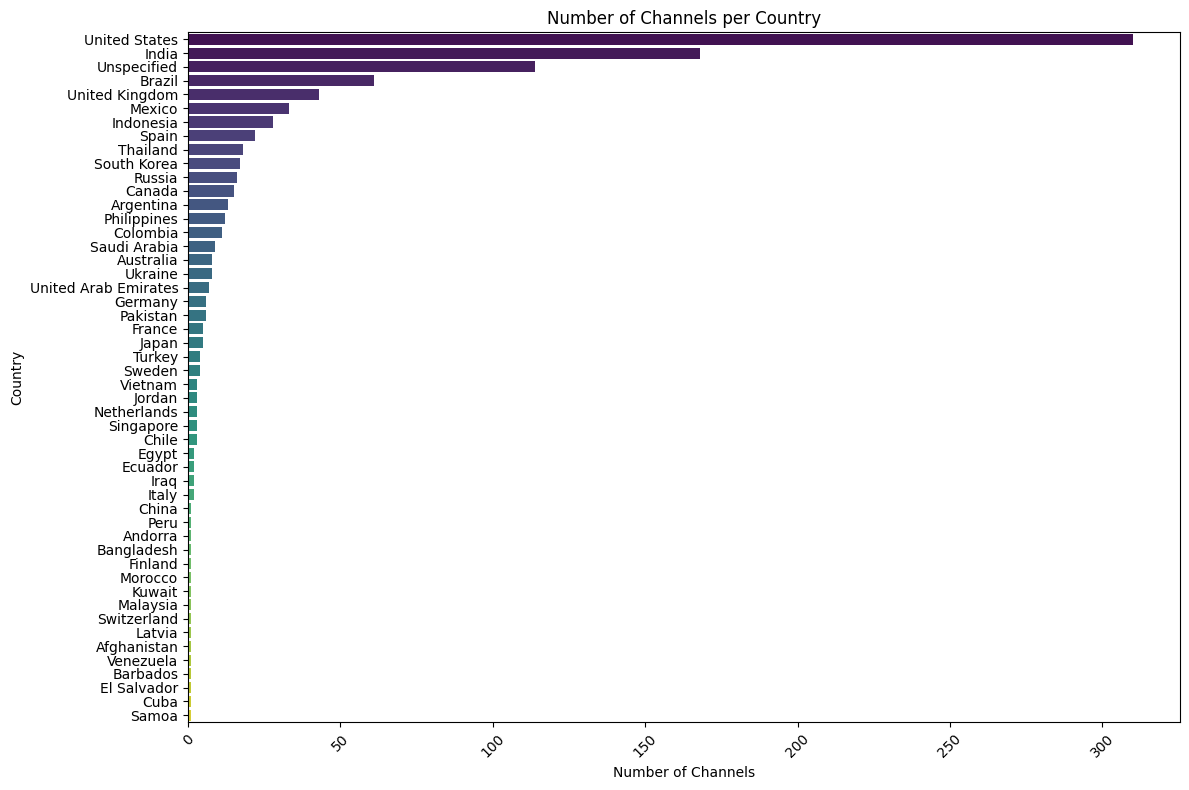

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by 'Channel_Count'
unique_countries = unique_countries.sort_values(by='Channel_Count', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Channel_Count', y='Country', data=unique_countries, hue='Country', palette='viridis')
plt.xlabel('Number of Channels')
plt.ylabel('Country')
plt.title('Number of Channels per Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


What is the relationship between the number of subscribers and total video views?
<br> -- Columns: subscribers, video views

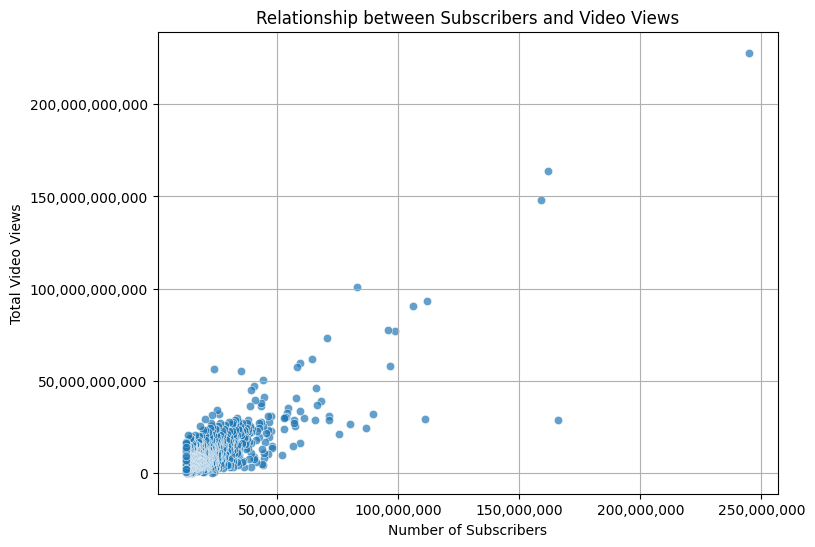

Pearson correlation coefficient: 0.8241736790655149


In [20]:
# Scatter plot to visualize the relationship between subscribers and video views
plt.figure(figsize=(8, 6))
sns.scatterplot(x='subscribers', y='video views', data=youtube_df, alpha=0.7)
plt.title('Relationship between Subscribers and Video Views')
plt.xlabel('Number of Subscribers')
plt.ylabel('Total Video Views')

# Use ticklabel_format to prevent scientific notation
plt.ticklabel_format(style='plain', axis='both', useOffset=False)

# Format the tick labels to include commas
formatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True)
plt.show()

# Correlation analysis
correlation = youtube_df['subscribers'].corr(youtube_df['video views'])
print(f"Pearson correlation coefficient: {correlation}")

The relationship seems to be strongly correlated, however, there are outliers.


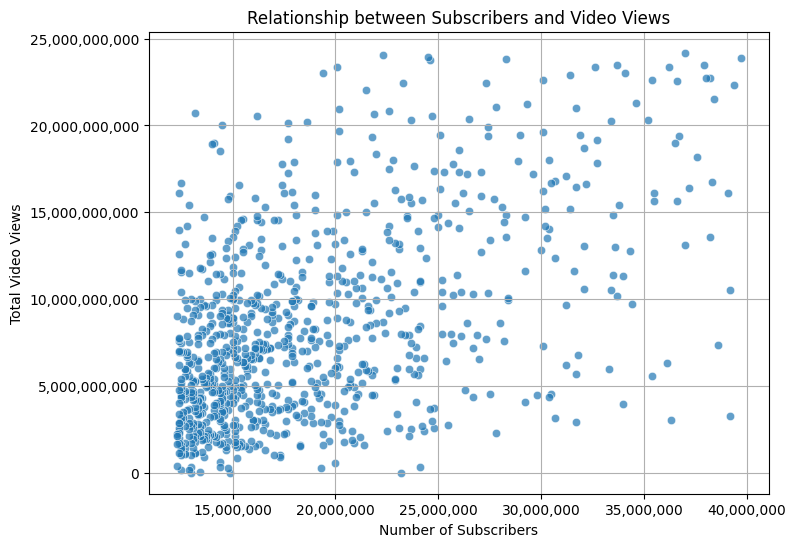

Pearson correlation coefficient: 0.5243682503442356


In [21]:
# Changing the range of values to zoom in the scatterplot
youtube_df_filtered = youtube_df[(youtube_df['subscribers'] <= 40000000) & (youtube_df['video views'] <= 25000000000)]

# Scatter plot to visualize the relationship between subscribers and video views
plt.figure(figsize=(8, 6))
sns.scatterplot(x='subscribers', y='video views', data=youtube_df_filtered, alpha=0.7)
plt.title('Relationship between Subscribers and Video Views')
plt.xlabel('Number of Subscribers')
plt.ylabel('Total Video Views')

# Use ticklabel_format to prevent scientific notation
plt.ticklabel_format(style='plain', axis='both', useOffset=False)

# Format the tick labels to include commas
formatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)


plt.grid(True)

plt.show()

# Correlation analysis
correlation = youtube_df_filtered['subscribers'].corr(youtube_df_filtered['video views'])
print(f"Pearson correlation coefficient: {correlation}")

What is the percentage of the population enrolled in tertiary education per country?
<br> -- Columns: Gross tertiary education enrollment, country


<Figure size 1200x800 with 0 Axes>

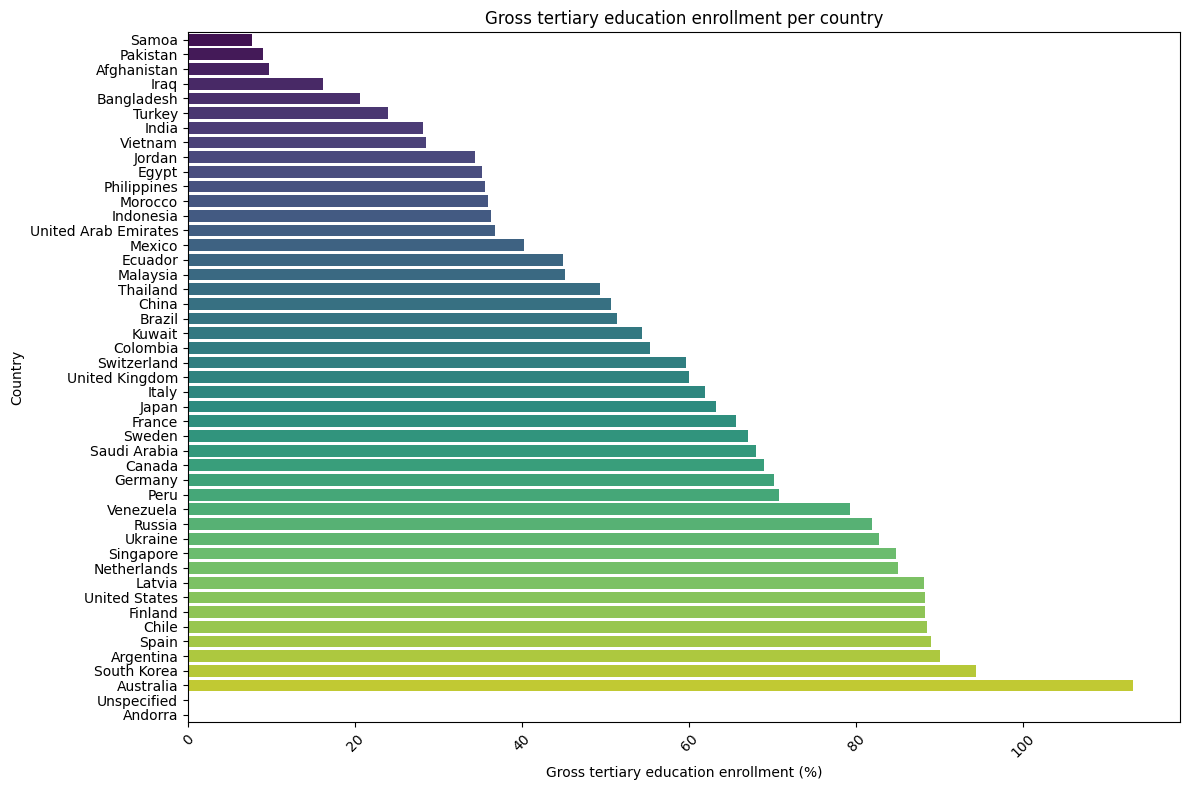

In [22]:
# Set the size of the plot
plt.figure(figsize=(12, 8))


sort = youtube_df_filtered.sort_values(by='Gross tertiary education enrollment (%)', ascending=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Gross tertiary education enrollment (%)', y='Country', data=sort, hue='Country', palette='viridis')
plt.xlabel('Gross tertiary education enrollment (%)')
plt.ylabel('Country')
plt.title('Gross tertiary education enrollment per country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

What is the unemployment rate of each country?
<br> -- Columns: Unemployment rate, Country


<Figure size 1200x800 with 0 Axes>

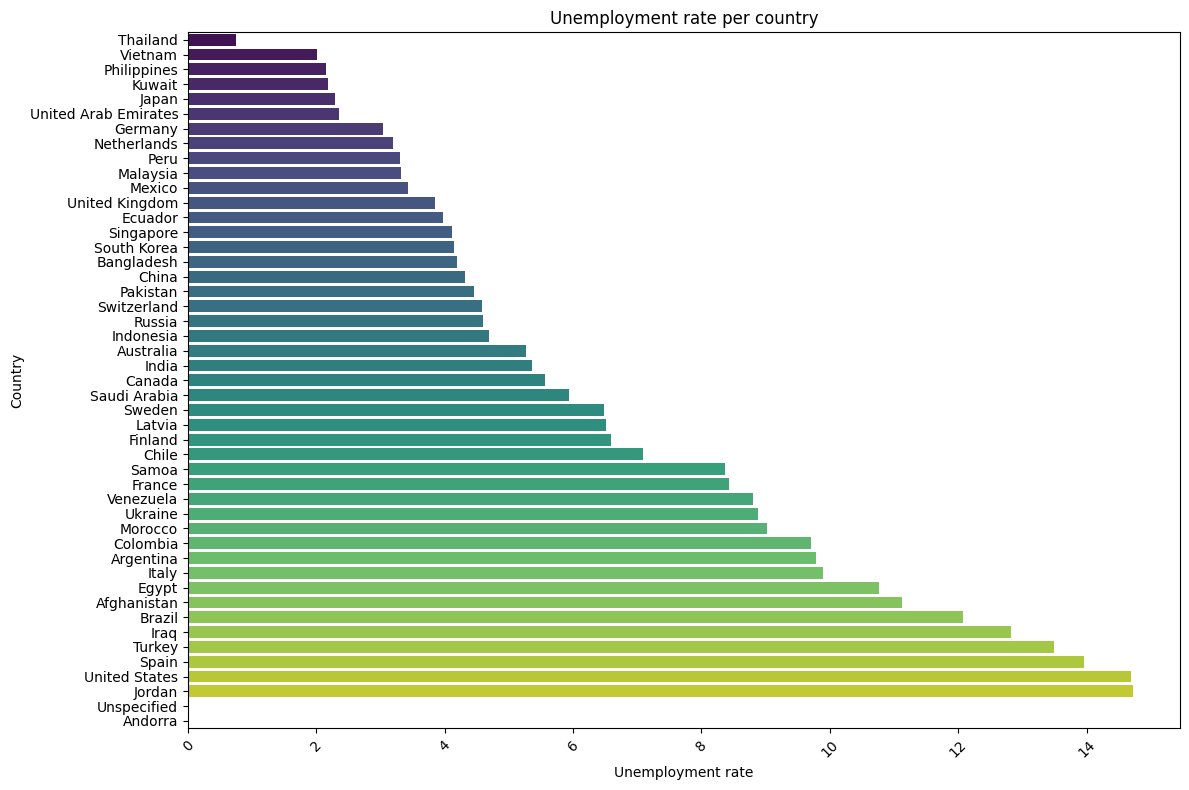

In [23]:
# Set the size of the plot
plt.figure(figsize=(12, 8))


sort = youtube_df_filtered.sort_values(by='Unemployment rate', ascending=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Unemployment rate', y='Country', data=sort, hue='Country', palette='viridis')
plt.xlabel('Unemployment rate')
plt.ylabel('Country')
plt.title('Unemployment rate per country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

What categories are the most popular among YouTube channels?
<br> -- Columns: category video views


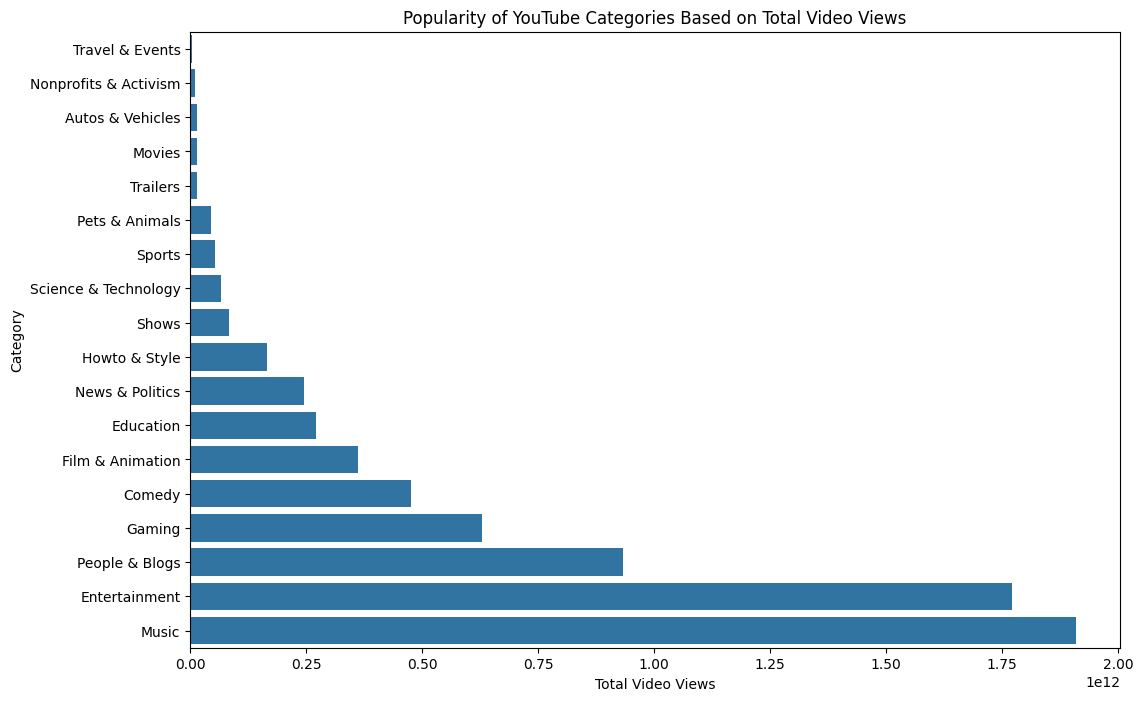

In [24]:
# Select relevant columns and ensure they are correctly named
category_views_data = youtube_df_filtered[['category', 'video views']].copy()

# Check for and handle any missing values in these columns
category_views_data = category_views_data.dropna(subset=['category', 'video views'])

# Ensure 'video views' is numeric
category_views_data['video views'] = pd.to_numeric(category_views_data['video views'], errors='coerce')

# Drop any rows with NaN values after conversion
category_views_data = category_views_data.dropna(subset=['video views'])

# Aggregate data by category
category_views_agg = category_views_data.groupby('category')['video views'].sum().reset_index()

category_views_agg = category_views_agg.sort_values(by='video views', ascending=True)

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Plot the bar plot
sns.barplot(x='video views', y='category', data=category_views_agg, errorbar=None)

# Add titles and labels
plt.title('Popularity of YouTube Categories Based on Total Video Views')
plt.xlabel('Total Video Views')
plt.ylabel('Category')

# Show the plot
plt.show()



## **III. Research Questions:** [Just one]
<ol>
<li>What factors (e.g., like count, comment count, published time) most significantly impact the view count of videos across different categories?
<li>How does the like-to-view ratio vary across videos in different categories, and what does this indicate about viewer engagement?
<li>What is the relationship between the number of comments and the view count of videos in various categories?
<li>What are the engagement patterns (likes, comments) for videos published at different times of the day and days of the week?
How do engagement metrics differ for videos in different categories and regions?
<li>What are the growth patterns (subscriber count, view count) for channels that switch between multiple content categories over time?
<li>How do videos' publication date and time influence their initial view count and long-term performance?
<li>How have the patterns of video publishing (frequency, timing) changed over recent years?
<li>How do video performance metrics (views, likes, comments) vary across channels based in different countries?
<li>What are the differences in subscriber growth rates and engagement metrics for channels in developed vs. developing countries?
<li>How do successful channels (high subscriber count and engagement) optimize their content strategies in terms of video count and publishing schedules?
<li>What are the typical video characteristics (title length, category) that correlate with high engagement for channels with varying subscriber counts?
</ol>